___

<a href='https://sites.google.com/fat.uerj.br/livia'> <img src='../../figures/capa2.png' /></a>
___

In [9]:
%matplotlib inline
path_data = '../../data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# Avaliando um Modelo #
Na ciência de dados, um *modelo* é um conjunto de suposições sobre os dados. Frequentemente, os modelos incluem suposições sobre processos aleatórios usados para gerar dados.

Às vezes, os cientistas de dados precisam decidir se um modelo é bom ou não. Nesta seção, discutiremos um exemplo de como tomar tal decisão.

## Seleção do Júri ##

A ciência de dados pode ser uma ferramenta poderosa para expor o racismo e a desigualdade em nossa sociedade. Esta seção é sobre um caso em que os dados forneceram evidências de viés racial na seleção do júri.

A Emenda VI da Constituição dos Estados Unidos declara que, "Em todos os processos criminais, o acusado terá direito a um julgamento rápido e público, por um júri imparcial do Estado e distrito onde o crime foi cometido."

Uma característica de um júri *imparcial* é que ele deve ser selecionado a partir de um corpo de jurados representativo da população da região relevante. Um painel de jurados é um grupo de pessoas escolhidas para serem jurados em potencial. O júri final do julgamento é escolhido entre eles por inclusão ou exclusão deliberada, podendo assim ter qualquer composição. Mas o painel maior do qual os jurados do julgamento são selecionados deve ser representativo da população.

A questão de saber se um júri é de fato representativo da população de uma região tem uma importante implicação legal. Se algum grupo da população fosse sistematicamente sub-representado no painel do júri, isso poderia levantar uma questão sobre se o júri foi imparcial e, portanto, se o réu recebeu o devido processo legal.

Essa foi a questão no caso da Suprema Corte de Robert Swain, um homem negro condenado no Condado de Talladega, Alabama, em 1962. A Suprema Corte negou seu recurso e Robert Swain foi posteriormente condenado à prisão perpétua.

No entanto, nossa análise abaixo mostra que os dados não estão de acordo com as conclusões do Tribunal. Pelo contrário, os dados apontam para um viés no processo de seleção do júri. Esse viés no sistema de justiça criminal refletia o preconceito generalizado e a injustiça predominante contra os negros na época.

Começaremos examinando os detalhes numéricos. Na época do julgamento, apenas homens com 21 anos ou mais eram elegíveis para servir em júris no condado de Talladega. Nessa população, 26% dos homens eram negros. Como é comum em julgamentos com júri, os jurados no julgamento de Robert Swain foram selecionados de um painel de pessoas que supostamente representavam a população de jurados elegíveis. Mas apenas oito homens entre o painel de 100 homens (ou seja, 8%) eram negros.

Como parte de seu apelo, Robert Swain questionou essa discrepância. Além disso, ele apontou que todos os painéis do júri do condado de Talladega nos últimos 10 anos continham apenas uma pequena porcentagem de painelistas negros.

A Suprema Corte dos EUA revisou o recurso e concluiu: "a disparidade percentual geral foi pequena". Mas essa afirmação era razoável? Se os membros do painel do júri fossem selecionados aleatoriamente da população elegível do condado, haveria alguma variação de chance. Não teríamos exatamente 26 painelistas negros em cada painel de 100 pessoas. Mas esperaríamos apenas oito?

A resposta é não. Vamos estabelecer isso e, em seguida, discutir alguns dos muitos vieses envolvidos.

## Um modelo de seleção aleatória ##

Uma visão dos dados – um modelo, em outras palavras – é que o painel foi selecionado aleatoriamente e acabou com um pequeno número de painelistas negros apenas devido ao acaso.

Como o painel deveria se assemelhar à população de todos os jurados elegíveis, é importante avaliar o modelo de seleção aleatória. Vamos ver se resiste ao escrutínio.

O modelo especifica os detalhes de um processo aleatório. Ele diz que os dados são como uma amostra aleatória de uma população na qual 26% das pessoas são negras. Estamos em uma boa posição para avaliar esse modelo pelas seguintes razões.

- Podemos simular dados com base no modelo. Ou seja, podemos simular sorteios aleatórios de uma população da qual 26% são negros.
- Nossa simulação mostrará como seria um painel ***se*** ele fosse selecionado aleatoriamente.
- Podemos então comparar os resultados da simulação com a composição de um júri real.
- Se os resultados de nossa simulação não forem consistentes com a composição do painel no julgamento, isso será uma evidência contra o modelo de seleção aleatória. Portanto, será uma evidência contra a imparcialidade do julgamento.

Vamos percorrer o processo passo a passo.

## A estatística ##
Primeiro, temos que escolher uma estatística para simular. A estatística deve ser capaz de nos ajudar a decidir entre o modelo e visões alternativas sobre os dados. O modelo diz que o painel foi sorteado aleatoriamente da população elegível. O ponto de vista alternativo é o caso de Robert Swain, que é que o painel continha muito poucos painelistas negros para serem sorteados aleatoriamente. Uma estatística natural, então, é o número ou *contagem* de painelistas negros na amostra. Valores pequenos da estatística favorecerão o ponto de vista de Robert Swain.

## Simulando a estatística sob o modelo ##
Se o modelo fosse verdadeiro, qual seria o tamanho da estatística? Para responder a isso, simulará a estatística sob a hipótese de seleção aleatória e observará a distribuição dos resultados.

### Simulando um valor da estatística ###

Podemos usar `sample_proportions` para simular um valor da estatística. O tamanho da amostra é 100, o tamanho do painel. A distribuição da qual iremos amostrar é a distribuição na população de jurados elegíveis. Como 26% deles eram negros, vamos amostrar a partir da distribuição especificada pelas proporções [0,26, 0,74].

In [2]:
sample_size = 100
eligible_population = [0.26, 0.74]

As categorias na matriz de saída de `sample_proportions` estão na mesma ordem que na matriz de entrada. Portanto, a proporção de painelistas negros na amostra aleatória é `item(0)` da matriz de saída. Execute a célula abaixo algumas vezes para ver como a proporção amostral de jurados negros varia em um painel selecionado aleatoriamente. Você vê algum valor tão baixo quanto 0,08?

In [35]:
def sample_proportions(sample_size, sample_population):
    return np.random.multinomial(sample_size, sample_population) / sample_size

sample_proportions(sample_size, eligible_population)

array([0.23, 0.77])

A contagem de cada categoria é o tamanho da amostra multiplicado pela proporção correspondente. Assim, podemos facilmente simular contagens em vez de proporções.

Vamos definir uma função que faz isso. A função sorteará um painel aleatoriamente e retornará o número de membros do painel que são negros.

In [36]:
def one_simulated_count():
    proportions = sample_proportions(sample_size, eligible_population)
    return sample_size * proportions.item(0)

### Simulando Múltiplos Valores da Estatística ###

O foco de nossa análise é a variabilidade nas contagens. Vamos gerar 10.000 valores simulados da contagem e ver como eles variam. Como de costume, faremos isso usando um loop `for` e coletando todas as contagens simuladas em um array.

In [37]:
counts = np.array([])
repetitions = 10000
for i in np.arange(repetitions):
    counts = np.append(counts, one_simulated_count())

## A previsão sob o modelo de seleção aleatória ##
Para interpretar os resultados de nossa simulação, podemos visualizar os resultados em um histograma empírico das contagens simuladas.

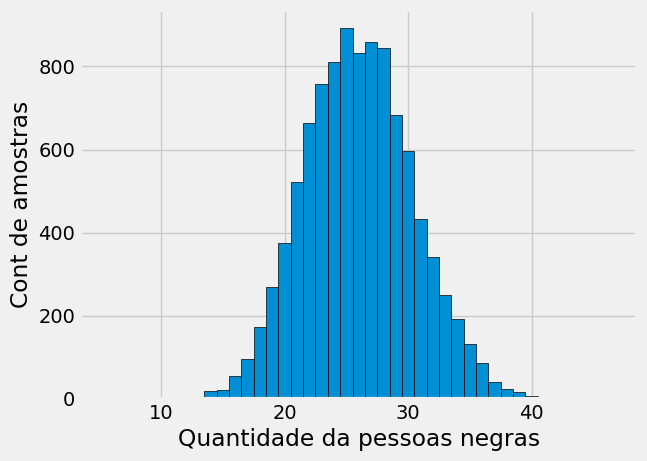

In [38]:
plt.Figure(figsize=(6, 5))
plt.hist(counts, bins=np.arange(5.5, 46.6, 1), edgecolor="black")
plt.xlabel('Quantidade da pessoas negras')
plt.ylabel('Cont de amostras')
plt.show()

O histograma nos mostra o que o modelo de seleção aleatória prevê sobre nossa estatística, o número de painelistas negros na amostra.

Para gerar cada contagem simulada, sorteamos 100 vezes aleatoriamente de uma população na qual 26% eram negros. Portanto, como seria de esperar, a maioria das contagens simuladas gira em torno de 26. Elas não são exatamente 26: há alguma variação. As contagens variam de cerca de 15 a cerca de 40.

## Comparando a previsão e os dados ##
No painel selecionado para o julgamento, havia oito painelistas negros. O histograma de contagens simuladas é redesenhado abaixo com o valor oito mostrado como um ponto vermelho no eixo horizontal. O ponto está muito distante na cauda esquerda do histograma. Muito poucas das 10.000 contagens simuladas por seleção aleatória resultaram em oito ou menos.

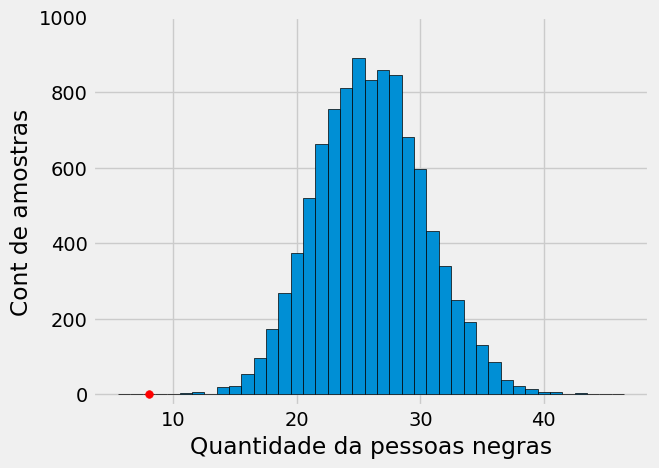

In [39]:
plt.Figure(figsize=(6, 5))
plt.hist(counts, bins=np.arange(5.5, 46.6, 1), edgecolor="black")
plt.xlabel('Quantidade da pessoas negras')
plt.ylabel('Cont de amostras')
plt.ylim(-30, 1000)
plt.scatter(8, 0, color='red', s=30)
plt.show()

## Conclusão da Análise de Dados ##

O gráfico acima é uma exibição visual do viés no processo de seleção. Isso mostra que, se selecionarmos um painel de tamanho 100 aleatoriamente da população elegível, é muito improvável que obtenhamos contagens de painelistas negros tão baixas quanto as oito observadas no painel no teste.

Isso é uma evidência de que o modelo de seleção aleatória dos jurados do painel não é consistente com os dados do painel. Embora seja *possível* que o painel tenha sido gerado por acaso, nossa simulação demonstra que é extremamente improvável.

A realidade do painel de julgamento está muito em desacordo com a suposição do modelo de seleção aleatória da população elegível. Quando os dados e um modelo são inconsistentes, o modelo é difícil de justificar. Afinal, os dados são reais. O modelo é apenas um conjunto de suposições. Quando as suposições estão em desacordo com a realidade, devemos questioná-las.

Portanto, a conclusão mais razoável é que a suposição de seleção aleatória é injustificada para este júri. Em outras palavras, a conclusão mais razoável é que o painel do júri *não* foi selecionado por amostragem aleatória da população de jurados elegíveis. Não obstante a opinião do Supremo Tribunal Federal, a diferença entre 26% e 8% não é tão pequena a ponto de ser bem explicada apenas pelo acaso.

## Viés Estatístico ##

A análise acima fornece evidências quantitativas de injustiça no julgamento de Robert Swain. Os dados apóiam sua posição de que lhe foi negado o júri imparcial a que tinha direito pela Constituição dos Estados Unidos.

Dados adicionais mostram que a exclusão de painelistas negros era generalizada. O julgamento da Suprema Corte, escrito em 1965, inclui evidências fornecidas por Robert Swain de que "apenas 10 a 15% dos painéis do júri escolhidos desde 1953 foram [negros], tendo havido apenas um caso em que a porcentagem foi tão alta de 23%." Veja onde 10% e 15% estão no eixo horizontal do histograma acima. Valores como esse também são altamente improváveis sob seleção aleatória da população elegível.

Quando um processo produz erros que estão sistematicamente em uma direção – como a porcentagem de painelistas negros sempre sendo menor do que o esperado – então os cientistas de dados dizem que o processo é **tendencioso** (*biased*). A quantificação desse viés é uma responsabilidade importante da ciência de dados.

Argumentos como o desta seção são agora apresentados com mais frequência nos tribunais. Na década de 1960, a Suprema Corte examinou os dados, mas chegou à conclusão errada de que "a disparidade percentual geral foi pequena". Para o significado de "pequeno", era errado confiar no que simplesmente parecia razoável para a maioria da Corte. As opiniões sobre o que era razoável não eram apenas puramente subjetivas, mas também vulneráveis à influência do preconceito racial generalizado. Se os argumentos do caso tivessem incluído a análise quantitativa desta seção, a Corte poderia não ter concluído que a disparidade percentual era pequena.

## Preconceito Racial ##
O viés estatístico no processo de seleção nasceu de um viés racial profundamente arraigado no sistema jurídico da época.

Por exemplo, o julgamento da Suprema Corte diz que os painéis do júri do condado de Talladega foram selecionados a partir de uma lista de nomes do júri que os comissários do júri obtiveram de "listas de cidades, listas de registros, listas de clubes e igrejas, conversas com outras pessoas na comunidade, tanto brancas quanto [não branco], e conhecidos pessoais e de negócios." Este processo foi claramente tendencioso contra os negros e a favor de pessoas nos círculos sociais e profissionais dos comissários. Essa exclusão sistemática de negros das listas do júri significou que muito poucos negros foram selecionados para os painéis do júri.

Mesmo quando havia painelistas negros, eles normalmente não chegavam ao júri final. Dos oito homens negros do painel do júri de Robert Swain, dois foram dispensados e seis foram eliminados pela promotoria em um processo chamado *desafio peremptório*. Nesse processo, os advogados de ambos os lados podem excluir ou *excluir* um certo número de membros do painel sem dar um motivo.

Argumentar contra a injustiça dos desafios peremptórios foi uma parte significativa do apelo de Robert Swain. Ele observou que "os promotores têm exercido seus ataques de forma consistente e sistemática para impedir que todos e quaisquer [membros negros do painel] sirvam no próprio [júri]". O Tribunal reconheceu que nunca houve um jurado negro em nenhum caso civil ou criminal no condado de Talladega. Mas ainda negou o recurso.

Preconceito racial no sistema jurídico derivado de preconceito na sociedade. O preconceito e a injustiça contra os negros foram tão prevalentes por tanto tempo que em muitas partes da sociedade se tornou quase uma maneira normal de pensar e agir. Como membros da sociedade, os Ministros do Supremo Tribunal Federal não ficaram imunes a isso. A maioria da Corte apresentou sua decisão como a interpretação mais adequada e lógica da lei. Mas não foi. A decisão da Corte sobre impugnações peremptórias acabou sendo revertida após batalhas legais que duraram 20 anos.

Robert Swain lutou contra um sistema de justiça criminal que estava contra ele. Aqui, conseguimos expor apenas um aspecto do preconceito sistêmico e do racismo que ele enfrentou e contra o qual tantos outros negros lutaram. Para muitos, a luta continua até hoje. Acreditamos que a ciência de dados pode ser uma aliada poderosa.